# Analysis of Performance

In [1]:
# load packages
import os 
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

plt.style.use('ggplot')

In [2]:
def get_performance_table(path, model_name):
    """
    concat performance by category into a table
    columns: category
    rows: 6 AP metrics
    """
    model_path = os.path.join(path, model_name)
    cat_names = ["shop", "user", "scale_1", "scale_2", "scale_3", "occlusion_1", "occlusion_2", "occlusion_3", "zoom_in_1", "zoom_in_2", "zoom_in_3", "viewpoint_1", "viewpoint_2", "viewpoint_3"]
    metric_list = []
    for cat in cat_names:
        cur_cat_path = os.path.join(model_path, cat)
        cur_dirs = sorted([d for d in os.listdir(cur_cat_path) if os.path.isdir(os.path.join(cur_cat_path, d))])
        recent_dir = cur_dirs[-1] # take the most recent time stamp
        
        # get six performances 
        json_path = os.path.join(cur_cat_path, recent_dir, f"{recent_dir}.json")
        with open(json_path, "r") as f:
            cur_performances = json.load(f)
        metric_list.append(
            [
                cur_performances["coco/segm_mAP"], 
                cur_performances["coco/segm_mAP_50"], 
                cur_performances["coco/segm_mAP_75"], 
                cur_performances["coco/segm_mAP_s"], 
                cur_performances["coco/segm_mAP_m"], 
                cur_performances["coco/segm_mAP_l"] 
            ]
        )
    
    # make dataframe
    df = pd.DataFrame(metric_list).T
    df.index = ["mAP", "mAP_50", "mAP_75", "mAP_s", "mAP_m", "mAP_l"]
    # df.columns = ["shop", "user", "scale_small", "scale_moderate", "scale_large", "occlusion_small", "occlusion_medium", "occlusion_large", "zoom_in_no", "zoom_in_medium", "zoom_in_large", "viewpoint_no_wear", "viewpoint_frontal", "viewpoint_side_or_back"]
    df.columns = ["shop", "user", "small", "moderate", "large", "slight", "medium", "heavy", "no", "medium", "large", "no wear", "frontal", "side/back"]
    return df


In [3]:
# specify path
cat_path = '/n/pehlevan_lab/Users/shengy/fashion/performance_by_cat'

In [4]:
# specify model name
# model_name = "mask-rcnn_r101_fpn_2x"
mask_rcnn_model_name = "mask-rcnn_r101_fpn_2x"
query_inst_model_name = "queryinst_r101_fpn_1x_coco"
mask2former_model_name = "mask2former_r101_1x"

In [5]:
mask_rcnn_performance = get_performance_table(cat_path, mask_rcnn_model_name)
query_inst_performance = get_performance_table(cat_path, query_inst_model_name)
mask2former_performance = get_performance_table(cat_path, mask2former_model_name)

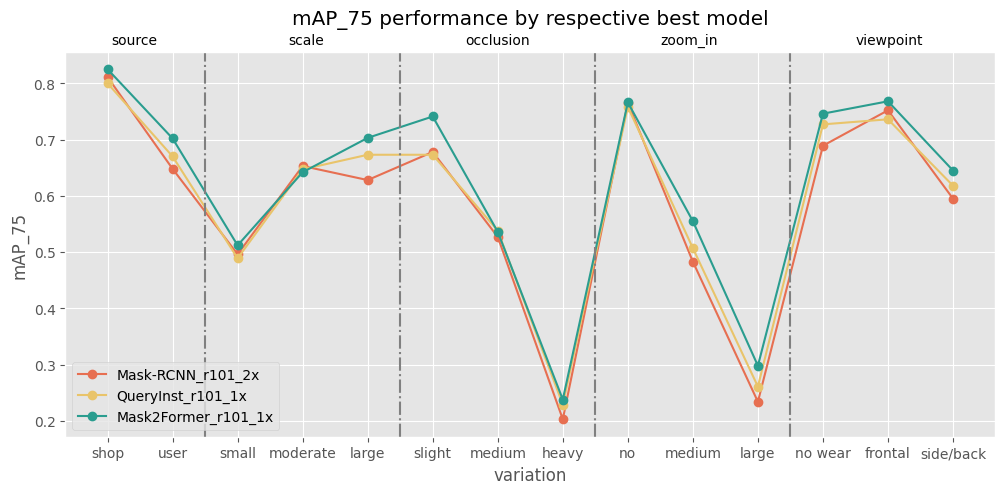

In [12]:
# vis 
metric_name = "mAP_75"
fig, ax = plt.subplots(figsize=(12, 5))
temp = pd.concat((mask_rcnn_performance.loc[[metric_name]], query_inst_performance.loc[[metric_name]], mask2former_performance.loc[[metric_name]]))
temp.T.plot(marker='o', ax=ax, color=["#e76f51", "#e9c46a", '#2a9d8f'])
ax.set_xticks(range(14), temp.columns)
plt.legend(['Mask-RCNN_r101_2x', "QueryInst_r101_1x", "Mask2Former_r101_1x"])
ax.axvline([1.5], c="gray", linestyle='-.')
ax.annotate("source", [0.05, 1.02], xycoords="axes fraction")
ax.axvline([4.5], c="gray", linestyle='-.')
ax.annotate("scale", [0.24, 1.02], xycoords="axes fraction")
ax.axvline([7.5], c="gray", linestyle='-.')
ax.annotate("occlusion", [0.43, 1.02], xycoords="axes fraction")
ax.axvline([10.5], c="gray", linestyle='-.')
ax.annotate("zoom_in", [0.64, 1.02], xycoords="axes fraction")
ax.annotate("viewpoint", [0.85, 1.02], xycoords="axes fraction")

ax.set_ylabel(metric_name)
ax.set_xlabel("variation")
ax.set_title(f"{metric_name} performance by respective best model", y=1.05)
# plt.show()
plt.savefig(f"figs/{metric_name}_by_cat_performance.pdf", dpi=100, bbox_inches='tight', facecolor='white')


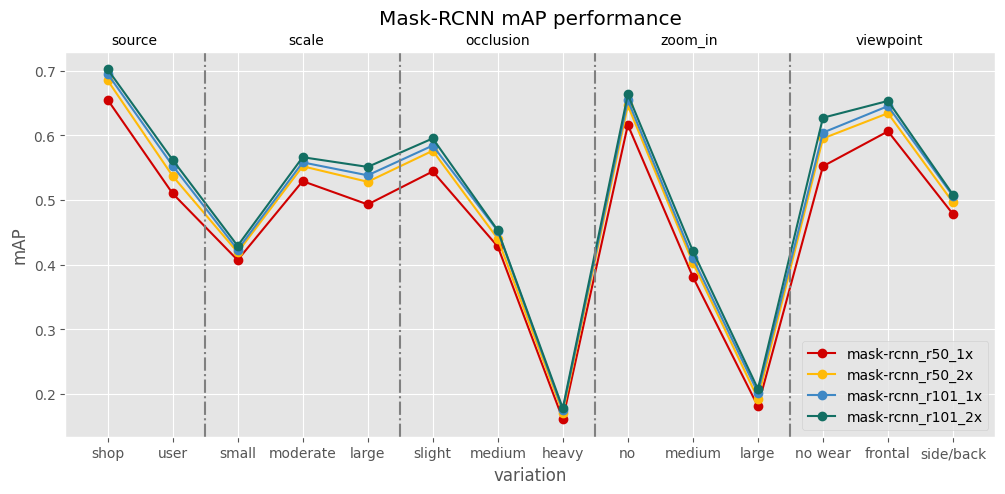

In [17]:
performance_1 = get_performance_table(cat_path, "mask-rcnn_r50_fpn_1x")
performance_2 = get_performance_table(cat_path, "mask-rcnn_r50_fpn_2x")
performance_3 = get_performance_table(cat_path, "mask-rcnn_r101_fpn_1x")
performance_4 = get_performance_table(cat_path, "mask-rcnn_r101_fpn_2x")

# performance_1 = get_performance_table(cat_path, "queryinst_r50_fpn_1x_coco")
# performance_2 = get_performance_table(cat_path, "queryinst_r50_fpn_2x_coco")
# performance_3 = get_performance_table(cat_path, "queryinst_r101_fpn_1x_coco")
# performance_4 = get_performance_table(cat_path, "queryinst_r101_fpn_2x_coco")

# performance_1 = get_performance_table(cat_path, "mask2former_r50_1x")
# performance_2 = get_performance_table(cat_path, "mask2former_r50_2x")
# performance_3 = get_performance_table(cat_path, "mask2former_r101_1x")
# performance_4 = get_performance_table(cat_path, "mask2former_r101_2x")

metric_name = "mAP"
fig, ax = plt.subplots(figsize=(12, 5))
temp = pd.concat((
    performance_1.loc[[metric_name]], 
    performance_2.loc[[metric_name]], 
    performance_3.loc[[metric_name]],
    performance_4.loc[[metric_name]]
))
temp.T.plot(marker='o', ax=ax, color=["#d00000", "#ffba08", '#3f88c5', "#136f63"])
plt.legend(['mask-rcnn_r50_1x', "mask-rcnn_r50_2x", "mask-rcnn_r101_1x", "mask-rcnn_r101_2x"])
# plt.legend(['query_inst_r50_1x', "query_inst_r50_2x", "query_inst_r101_1x", "query_inst_r101_2x"])
ax.set_xticks(range(14), temp.columns)
ax.axvline([1.5], c="gray", linestyle='-.')
ax.annotate("source", [0.05, 1.02], xycoords="axes fraction")
ax.axvline([4.5], c="gray", linestyle='-.')
ax.annotate("scale", [0.24, 1.02], xycoords="axes fraction")
ax.axvline([7.5], c="gray", linestyle='-.')
ax.annotate("occlusion", [0.43, 1.02], xycoords="axes fraction")
ax.axvline([10.5], c="gray", linestyle='-.')
ax.annotate("zoom_in", [0.64, 1.02], xycoords="axes fraction")
ax.annotate("viewpoint", [0.85, 1.02], xycoords="axes fraction")

ax.set_ylabel(metric_name)
ax.set_xlabel("variation")
ax.set_title(f"Mask-RCNN {metric_name} performance", y=1.05)
# plt.show()
plt.savefig("figs/mask-rcnn_mAP_performances.pdf", dpi=100, facecolor='white', bbox_inches='tight')

In [ ]:
# what are my insights? 

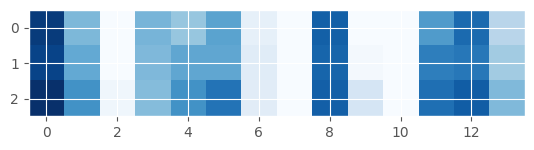

In [19]:
plt.imshow(temp, cmap='Blues', vmin=0.5)

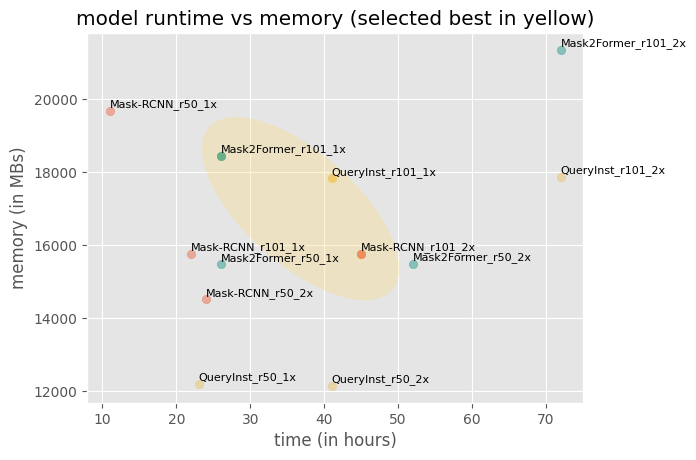

In [53]:
# memory time plot
# time = [24 + 21, 21 + 17, 24 + 4]
# memory = [15766, 17871, 24231]
from matplotlib.patches import Ellipse

time = [
    [11, 24, 22, 24 + 21],
    [23, 24 + 17, 24 + 17, 24 * 3],
    [24 + 2, 2 * 24 + 4, 24 + 2, 24 * 3]
]

memory = [
    [19688, 14517, 15761, 15766], 
    [12187, 12134, 17837, 17873],
    [15479, 15483, 18448, 21355],
]

colors = ["#e76f51", "#e9c46a", '#2a9d8f']
    
ft = 8


fig, ax = plt.subplots()
names = ["Mask-RCNN", "QueryInst", "Mask2Former"]
for cur_time, cur_memory, cur_color, cur_name in zip(time, memory, colors, names):
    ax.scatter(cur_time, cur_memory, c=cur_color, alpha=0.5)
    
    ax.annotate(f"{cur_name}_r50_1x", xy=(cur_time[0], cur_memory[0] + 100), fontsize=ft)
    ax.annotate(f"{cur_name}_r50_2x", xy=(cur_time[1], cur_memory[1] + 100), fontsize=ft)
    ax.annotate(f"{cur_name}_r101_1x", xy=(cur_time[2], cur_memory[2] + 100), fontsize=ft)
    ax.annotate(f"{cur_name}_r101_2x", xy=(cur_time[3], cur_memory[3] + 100), fontsize=ft)
    
# reassign colors
ax.scatter([time[0][-1]], [memory[0][-1]], c=colors[0])
ax.scatter([time[1][-2]], [memory[1][-2]], c=colors[1])
ax.scatter([time[2][-2]], [memory[2][-2]], c=colors[2])

# draw an eclipse
ellipse = Ellipse((36.8, 17000), 20, 5000, angle=0.2, alpha=0.3, color=[255 / 256, 221 / 256, 118 / 256])
ax.add_artist(ellipse)

ax.set_xlabel("time (in hours)")
ax.set_ylabel("memory (in MBs)")
plt.title("model runtime vs memory (selected best in yellow)")
# plt.show()
plt.savefig("figs/runtime_memory.pdf", dpi=100, bbox_inches='tight', facecolor='white')